In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Model 1 Equations (Figure 27 in paper)
def d_st_dt(alpha_e, s_t, e_t, alpha_i, i_t, gamma, r_t):
    return -alpha_e * s_t * e_t - alpha_i * s_t * i_t + gamma * r_t

def d_et_dt(alpha_e, s_t, e_t, alpha_i, i_t, kappa, rho):
    return alpha_e * s_t * e_t + alpha_i * s_t * i_t - kappa * e_t - rho * e_t

def d_it_dt(kappa, e_t, beta, i_t, mu):
    return kappa * e_t - beta * i_t - mu * i_t

def d_rt_dt(beta, i_t, rho, e_t, gamma, r_t):
    return beta * i_t + rho * e_t - gamma * r_t

def d_pt_dt(mu, i_t):
    return mu * i_t

def get_derivatives(params_dict, proportion_dict):
    # Gets derivatives at current point in time using pre-defined differential equations
    return_dict = {"s_t": 0, "e_t": 0, "i_t": 0, "r_t": 0, "p_t": 0,}
    
    return_dict["s_t"] = d_st_dt(params_dict["alpha_e"], proportion_dict["s_t"], proportion_dict["e_t"], 
                                     params_dict["alpha_i"], proportion_dict["i_t"], params_dict["gamma"], 
                                     proportion_dict["r_t"])
    
    return_dict["e_t"] = d_et_dt(params_dict["alpha_e"], proportion_dict["s_t"], proportion_dict["e_t"], 
                                     params_dict["alpha_i"], proportion_dict["i_t"], params_dict["kappa"], 
                                     params_dict["rho"])
    
    return_dict["i_t"] = d_it_dt(params_dict["kappa"], proportion_dict["e_t"], params_dict["beta"], 
                                     proportion_dict["i_t"], params_dict["mu"])
    
    return_dict["r_t"] = d_rt_dt(params_dict["beta"], proportion_dict["i_t"], params_dict["rho"], 
                                     proportion_dict["e_t"], params_dict["gamma"], proportion_dict["r_t"])
    
    return_dict["p_t"] = d_pt_dt(params_dict["mu"], proportion_dict["i_t"])
    
    return return_dict
    

In [3]:
# Simulating Figure 10, No Quarantine
params_dict = {"alpha_e": 0.6, # contagion factor between exposed and susceptible populations
               "alpha_i": 0.005, # contagion factor between infected and susceptible populations
               "kappa": 0.05, # the rate at which symptoms appear in exposed cases
               "rho": 0.08, # rate of recovery for exposed cases
               "beta": 0.1, # rate of recovery for infected cases
               "mu": 0.02, # mortality rate of infected cases
               "gamma": 0.001 # how long someone is immune after getting the disease
              }

# Base proportions
curr_proportion_dict = {"s_t": 0.99999, # proportion of population that is susceptible (assumed to be everyone not infected/recovered)
                   "e_t": 0, # proportion of population that is exposed
                   "i_t": 0.00001, # proportion of population that is infected (assumed to start at 1 out of 7.8 billion)
                   "r_t": 0, # proportion of population that has recovered (starts at 0 because disease just started)
                   "p_t": 0 # proportion of population that passes away due to the disease
                  }

final_noquarantine_dataframe = pd.DataFrame(curr_proportion_dict, index=[0])
curr_proportion_counter = Counter(curr_proportion_dict)

# 150 days
for day_time in np.arange(0, 150):
    proportion_update_counter = Counter(get_derivatives(params_dict, curr_proportion_dict))
    curr_proportion_counter.update(proportion_update_counter)
    curr_proportion_dict = dict(curr_proportion_counter)
    new_df = pd.DataFrame(curr_proportion_dict, index=[final_noquarantine_dataframe.shape[0]])
    final_noquarantine_dataframe = pd.concat([final_noquarantine_dataframe, new_df])

In [4]:
# Simulating Figure 10, Quarantine
params_dict = {"alpha_e": 0.6, # contagion factor between exposed and susceptible populations
               "alpha_i": 0.005, # contagion factor between infected and susceptible populations
               "kappa": 0.05, # the rate at which symptoms appear in exposed cases
               "rho": 0.08, # rate of recovery for exposed cases
               "beta": 0.1, # rate of recovery for infected cases
               "mu": 0.02, # mortality rate of infected cases
               "gamma": 0.001 # how long someone is immune after getting the disease
              }

# Base proportions
curr_proportion_dict = {"s_t": 0.99999, # proportion of population that is susceptible (assumed to be everyone not infected/recovered)
                   "e_t": 0, # proportion of population that is exposed
                   "i_t": 0.00001, # proportion of population that is infected (assumed to start at 1 out of 7.8 billion)
                   "r_t": 0, # proportion of population that has recovered (starts at 0 because disease just started)
                   "p_t": 0 # proportion of population that passes away due to the disease
                  }

final_quarantine_dataframe = pd.DataFrame(curr_proportion_dict, index=[0])
curr_proportion_counter = Counter(curr_proportion_dict)

# 30 days
for day_time in np.arange(0, 30):
    proportion_update_counter = Counter(get_derivatives(params_dict, curr_proportion_dict))
    curr_proportion_counter.update(proportion_update_counter)
    curr_proportion_dict = dict(curr_proportion_counter)
    new_df = pd.DataFrame(curr_proportion_dict, index=[final_quarantine_dataframe.shape[0]])
    final_quarantine_dataframe = pd.concat([final_quarantine_dataframe, new_df])

# At day 30, quarantine is put into effect, changing parameters
params_dict = {"alpha_e": 0.1, # contagion factor between exposed and susceptible populations
               "alpha_i": 0.001, # contagion factor between infected and susceptible populations
               "kappa": 0.05, # the rate at which symptoms appear in exposed cases
               "rho": 0.08, # rate of recovery for exposed cases
               "beta": 0.1, # rate of recovery for infected cases
               "mu": 0.02, # mortality rate of infected cases
               "gamma": 0.001 # how long someone is immune after getting the disease
              }

# 30 days
for day_time in np.arange(30, 60):
    proportion_update_counter = Counter(get_derivatives(params_dict, curr_proportion_dict))
    curr_proportion_counter.update(proportion_update_counter)
    curr_proportion_dict = dict(curr_proportion_counter)
    new_df = pd.DataFrame(curr_proportion_dict, index=[final_quarantine_dataframe.shape[0]])
    final_quarantine_dataframe = pd.concat([final_quarantine_dataframe, new_df])
    
# At day 60, quarantine is lifted slightly, changing parameters yet again
params_dict = {"alpha_e": 0.4, # contagion factor between exposed and susceptible populations
               "alpha_i": 0.001, # contagion factor between infected and susceptible populations
               "kappa": 0.05, # the rate at which symptoms appear in exposed cases
               "rho": 0.08, # rate of recovery for exposed cases
               "beta": 0.1, # rate of recovery for infected cases
               "mu": 0.02, # mortality rate of infected cases
               "gamma": 0.001 # how long someone is immune after getting the disease
              }

# 90 days
for day_time in np.arange(60, 150):
    proportion_update_counter = Counter(get_derivatives(params_dict, curr_proportion_dict))
    curr_proportion_counter.update(proportion_update_counter)
    curr_proportion_dict = dict(curr_proportion_counter)
    new_df = pd.DataFrame(curr_proportion_dict, index=[final_quarantine_dataframe.shape[0]])
    final_quarantine_dataframe = pd.concat([final_quarantine_dataframe, new_df])

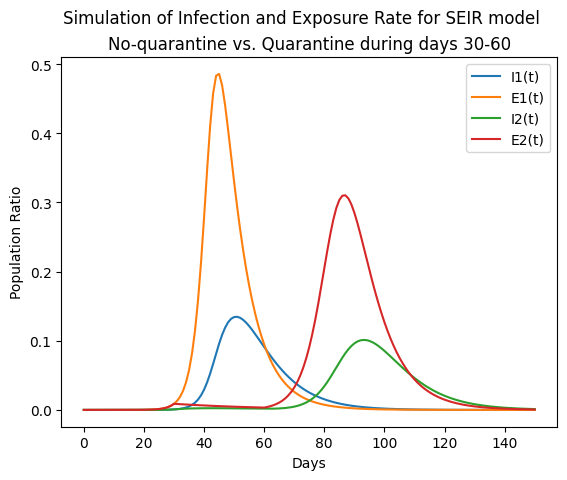

In [5]:
plt.plot(np.arange(0, 151), final_noquarantine_dataframe["i_t"], label='I1(t)')
plt.plot(np.arange(0, 151), final_noquarantine_dataframe["e_t"], label='E1(t)')

plt.plot(np.arange(0, 151), final_quarantine_dataframe["i_t"], label='I2(t)')
plt.plot(np.arange(0, 151), final_quarantine_dataframe["e_t"], label='E2(t)')
plt.legend()

plt.suptitle("Simulation of Infection and Exposure Rate for SEIR model")
plt.title("No-quarantine vs. Quarantine during days 30-60")
plt.xlabel("Days")
plt.ylabel("Population Ratio")
plt.show()

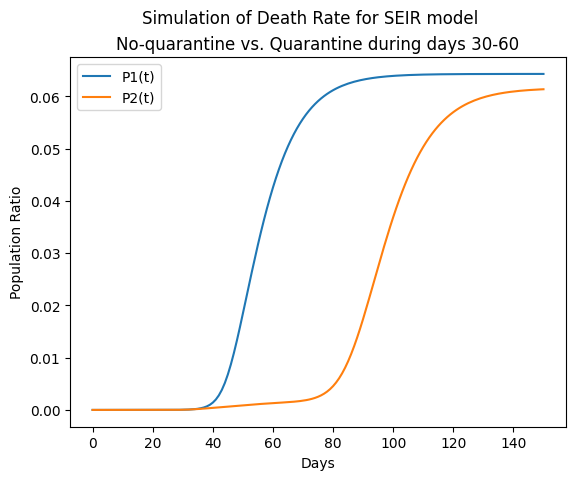

In [6]:
plt.plot(np.arange(0, 151), final_noquarantine_dataframe["p_t"], label='P1(t)')
plt.plot(np.arange(0, 151), final_quarantine_dataframe["p_t"], label='P2(t)')

plt.legend()

plt.suptitle("Simulation of Death Rate for SEIR model")
plt.title("No-quarantine vs. Quarantine during days 30-60")
plt.xlabel("Days")
plt.ylabel("Population Ratio")
plt.show()